# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Moaz Barakat

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Assignment 5 Imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import mglearn

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_csv('seeds_dataset.txt', sep="\t", header=None)
# Columns identified from source's website
df.columns = ["Area", "Perimeter ", "Compactness ", "Kernel Length","Kernel Width", "Asymmetry Coef", "Kernel Groove Length","Wheat Type"]
df.head()

,Area,Perimeter,Compactness,Kernel Length,Kernel Width,Asymmetry Coef,Kernel Groove Length,Wheat Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   Kernel Length         210 non-null    float64
 4   Kernel Width          210 non-null    float64
 5   Asymmetry Coef        210 non-null    float64
 6   Kernel Groove Length  210 non-null    float64
 7   Wheat Type            210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB
None


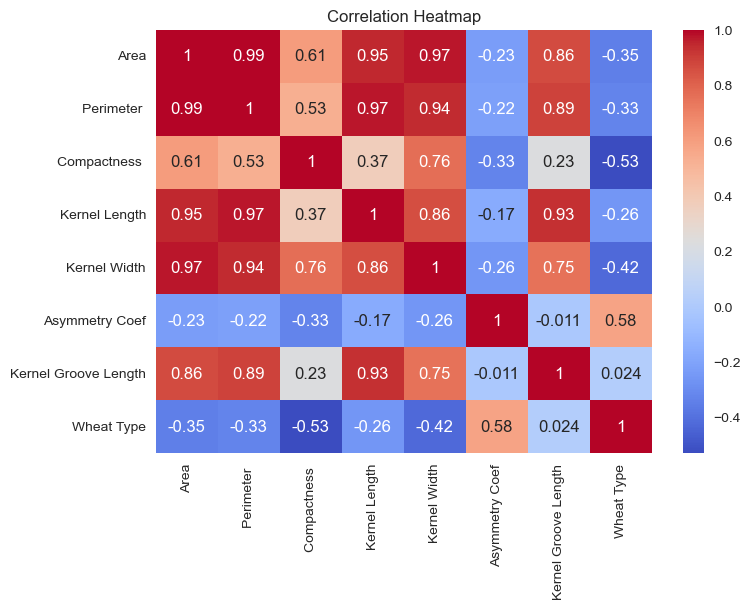

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
X = df.drop(columns=['Wheat Type'])  # 'X' contains all features except 'Wheat Type'
y = df['Wheat Type']  # 'y' contains the 'Wheat Type' column

# Check for missing values, no nulls!
print(df.info())

# Visualize the correlation between numerical variables
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

Since the features may be on different scales and the data for the PCA should be normalized (having zero mean and unit variance), I will select the standard scaler to bring all the features to a standard scale (standarize the data)

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(168, 7)
(168,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model
# Note no hyperparamters specified, can do like max-iter=5000
lr = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [9]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, return_train_score=True)

grid_search_lr.fit(X_train_scaled, y_train)

print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lr.best_score_))
print("Test set score: {:.2f}".format(grid_search_lr.score(X_test_scaled, y_test)))


Best parameters: {'C': 10.0, 'fit_intercept': True}
Best cross-validation score: 0.95
Test set score: 0.95


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# TODO: Predict y labels using best estimator
y_pred = grid_search_lr.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Predicted Best Estimator score: {:.2f}".format(accuracy))

Predicted Best Estimator score: 0.95


In [11]:
# TODO: Reduce dimensions of test data for plotting

# Note: similar to what we did in lab 8

# Instantiate the PCA model
pca = PCA()

# Fit the model to the scaled data
pca_result = pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print("Explained variance: {}".format(explained_variance_ratio))



Explained variance: [7.20015271e-01 1.74506199e-01 9.11339717e-02 1.06335697e-02
 2.87111701e-03 7.16015599e-04 1.23856788e-04]


Text(0, 0.5, 'Principal Component 2')

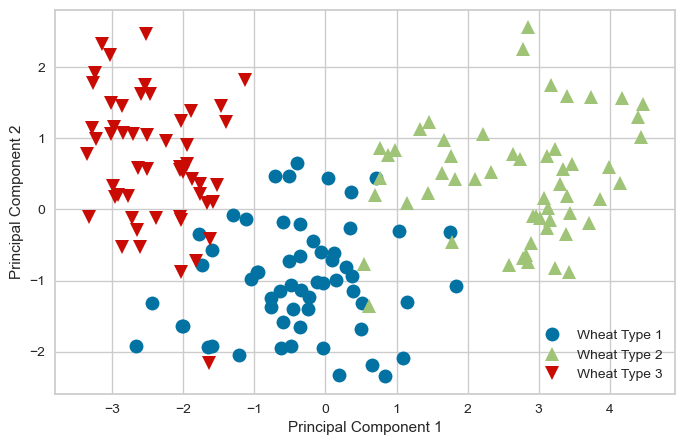

In [12]:
# TODO: Plot test points colored by predicted label

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(pca_result[:, 0], pca_result[:, 1], y_train)
plt.legend(["Wheat Type 1","Wheat Type 2","Wheat Type 3"], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion?
- Based on the test and train score of 0.95 as shown above, it looks like the model did well. There is also no overfitting since the test scores scored as high as the train data but on the never seen predicted data. This is a good model for this dataset.
2. Did PCA work well for this model? How does this relate to the results from the model used? 
- Based on the results shown for the PCA, the targets are logically grouped together which means that the PCA model worked well. This makes sense since the linear logistic model got a really high score of 0.95 and PCA is a linear method, so it is expected that it perform well given the previous result.




### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Where did you source your code?
 - Code is based on a combination of lectures examples and documentation from scikit learn
  - Lecture slides adopted from: <cite>Introduction to Machine Learning with Python, Müller and Guido, 1st ed, 2016 https://github.com/amueller/introduction_to_ml_with_python</cite>
  - Scikit learn general documentation available at: <cite> https://scikit-learn.org/stable/ </cite>
  - Wheat seeds dataset: <cite> https://archive.ics.uci.edu/dataset/236/seeds </cite>
2. In what order did you complete the steps?
  - The order of the steps was done as per the assignment and all other assignments so far, steps 1-5 as it seemed logically
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
  - Similar to all previous assignments, I explicitly avoided using any generative AI throughout this process so I can learn while doing the assignment
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
  - No major challenges, examples on D2L and the labs really helped me a lot. 

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [13]:
# TODO: Scale feature matrix

#Note similar to Lab 9

#Note, df_scaled drops the target based on the info above
df_scaled = df.drop(columns=['Wheat Type']).copy()

scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)



The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

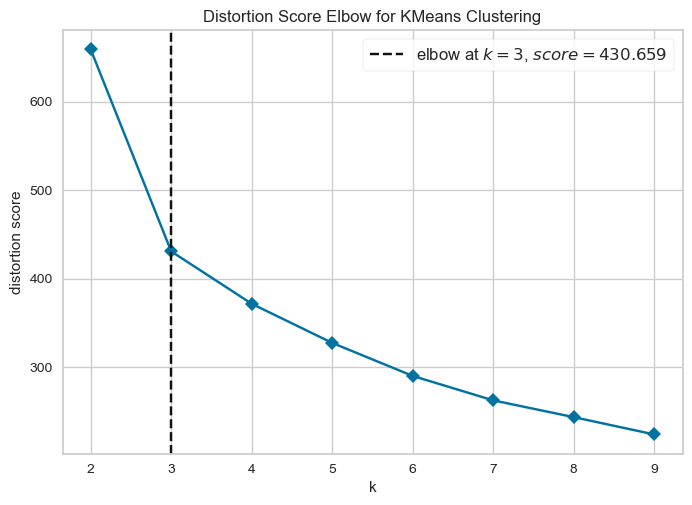

KElbowVisualizer(ax=<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=54), k=(2, 10),
                 timings=False)

In [14]:
# TODO: Use the elbow method to determine the optimal number of clusters

kelbow_visualizer(KMeans(random_state=54), df_scaled, k=(2,10),
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [26]:
# TODO: Implement K-means with the number of clusters determined in the previous step

#Note above result yielded value of 3

kmeans = KMeans(n_clusters=3, random_state=54, n_init=10)
kmeans.fit(df_scaled)

df['clusters'] = kmeans.labels_
df['clusters'] = df['clusters'].astype('category')


c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
# TODO: Calculate the three different validation metrics

cluster_labels = kmeans.fit_predict(df_scaled)

silhouette = silhouette_score(df_scaled, cluster_labels)
calihar = calinski_harabasz_score(df_scaled, cluster_labels)
daviesbould = davies_bouldin_score(df_scaled, cluster_labels)

print("The silhouette score is: {:.2f}".format(silhouette))
print("The calinski-harabasz score is: {:.2f}".format(calihar))
print("The davies-bouldin score is: {:.2f}".format(daviesbould))

The silhouette score is: 0.40
The calinski-harabasz score is: 249.78
The davies-bouldin score is: 0.93


c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

<AxesSubplot: >

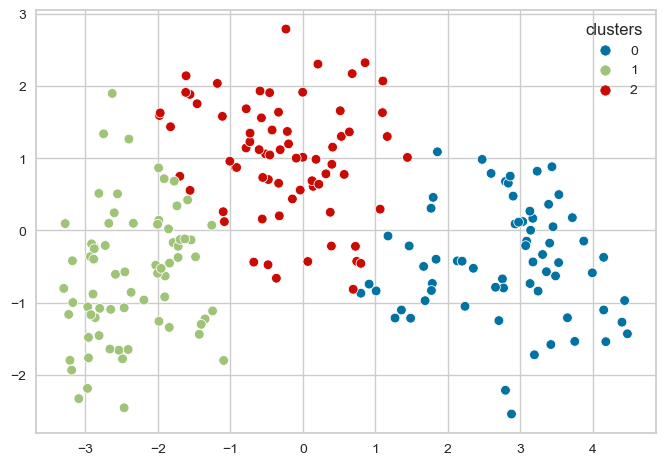

In [28]:
# TODO: Plot clustering results
centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=df_scaled.columns)
centers_scaled = pd.DataFrame(kmeans.cluster_centers_, columns=df_scaled.columns)

pca_km = PCA()
pca_km.fit(df_scaled)
X_PCA = pca_km.transform(df_scaled)
sns.scatterplot(x=X_PCA[:,0], y=X_PCA[:,1], hue=df['clusters'])


### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

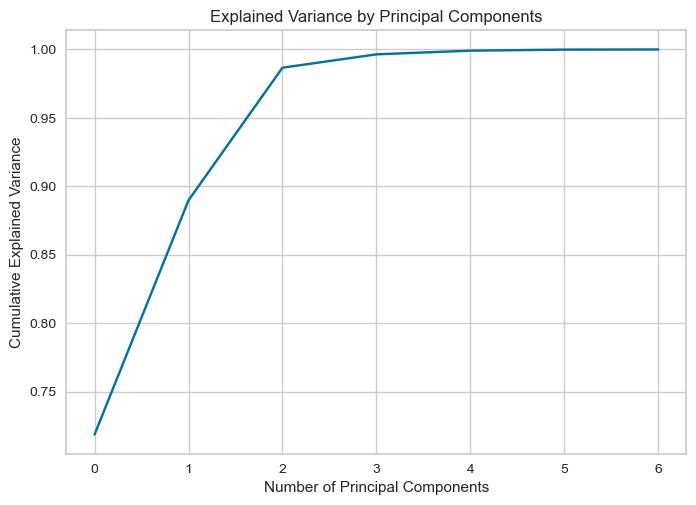

PCA component axes shape: (7, 7)


In [29]:
# TODO: Find the number of principal components using explained variance ratio
# Calculate the explained variance ratio
explained_variance_ratio = pca_km.explained_variance_ratio_

# Plot the explained variance ratio
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

print("PCA component axes shape: {}".format(pca.components_.shape))


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [30]:
# TODO: Use PCA to transform the data

#Based on the graph above, only need the first two components for 95%

feature_names = ["Area", "Perimeter ", "Compactness ", "Kernel Length","Kernel Width", "Asymmetry Coef", "Kernel Groove Length"]
pca_df_all = pd.DataFrame(data=X_PCA, columns=[f'PC{i}' for i in range(1, len(feature_names)+1)])
pca_df = pca_df_all.iloc[:, 0:2] 

#pca_df['Wheat Type'] = df['Wheat Type']

# Extract features and target
X_selec = pca_df.copy()
y_selec = df['Wheat Type']

pca_km_sel = PCA(n_components=2)
pca_km_sel.fit(df_scaled)
X2D_PCA = pca_km_sel.transform(df_scaled)
kmeans.predict



c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot: >

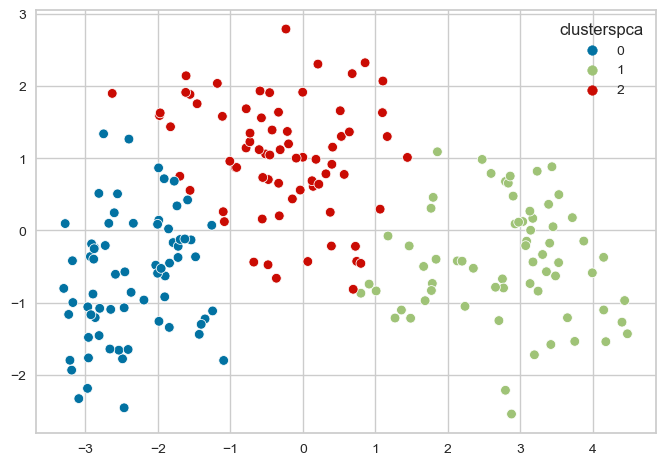

In [31]:
# TODO: Implement K-means with the transformed data

kmeanspca = KMeans(n_clusters=3, random_state=54, n_init=10)
kmeanspca.fit(X_selec)

df['clusterspca'] = kmeanspca.labels_
df['clusterspca'] = df['clusterspca'].astype('category')

sns.scatterplot(x=X2D_PCA[:,0], y=X2D_PCA[:,1], hue=df['clusterspca'])


In [32]:
# TODO: Calculate the three different validation metrics

cluster_labels_pca = kmeanspca.fit_predict(X_selec)

silhouette_pca = silhouette_score(X_selec, cluster_labels_pca)
calihar_pca = calinski_harabasz_score(X_selec, cluster_labels_pca)
daviesbould_pca = davies_bouldin_score(X_selec, cluster_labels_pca)

print("The silhouette score is: {:.2f}".format(silhouette_pca))
print("The calinski-harabasz score is: {:.2f}".format(calihar_pca))
print("The davies-bouldin score is: {:.2f}".format(daviesbould_pca))

The silhouette score is: 0.49
The calinski-harabasz score is: 397.30
The davies-bouldin score is: 0.71


c:\Users\Mido\anaconda3\envs\ensf-ml\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [41]:
# TODO: Display results

km_score = kmeans.score(df_scaled,y)
km_pca_score = kmeanspca.score(X_selec,y_selec)

r2_results_list = [[km_score, silhouette,calihar,daviesbould],[km_pca_score, silhouette_pca,calihar_pca,daviesbould_pca]]
resultvals = pd.DataFrame(r2_results_list,columns=["Kmeans score","Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"], index=['Original Cluster', 'PCA Transformed Cluster'])

#This has cluster columns categories side by side
results = pd.DataFrame(df.iloc[:, 8:10])

#This has result score and validation
resultvals


,Kmeans score,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score
Original Cluster,-430.658973,0.400727,249.784175,0.927871
PCA Transformed Cluster,-270.331693,0.493430,397.301078,0.706673


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

1. Did the optimal number of clusters make sense based on the context?
- Since there were 3 different types of wheat from the original data, it made sense to have 3 clusters as the optimal number of clusters, this means the elbow method was effective and made sense
2. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results?
- Based on the results and the graphs shown above for the original and PCA transformed, the graphs did have a similar distribution and similar logical grouping for the three classes
3. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not?
- Based on the explained variance by principle components graph, the number of components to explain at least 95% variance was **2** and this is what I used. Evident from the table above highlighting the different scores, PCA did improve the results compared to the original. As per lecture, lowering num of features results in better clustering accuracy which is the concept of PCA dimensionality reduction. 

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Where did you source your code?
 - Code is based on a combination of lectures examples and documentation from scikit learn
  - Lecture slides adopted from: <cite>Introduction to Machine Learning with Python, Müller and Guido, 1st ed, 2016 https://github.com/amueller/introduction_to_ml_with_python</cite>
  - Scikit learn general documentation available at: <cite> https://scikit-learn.org/stable/ </cite>
  - Wheat seeds dataset: <cite> https://archive.ics.uci.edu/dataset/236/seeds </cite>
2. In what order did you complete the steps?
  - The order of the steps was done as per the assignment and all other assignments so far, steps 1-5 as it seemed logically
3. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
  - Similar to all previous assignments, I explicitly avoided using any generative AI throughout this process so I can learn while doing the assignment
4. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
  - No major challenges, examples on D2L and the labs really helped me a lot. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

what you liked or disliked: 
- I liked that we worked with PCA and were able to calculate the different score like sillhouette etc.

found interesting, confusing, challangeing, motivating:
- It was intersting how the clustering process worked and how supervised learning differed from unsupervised learning